## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [96]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

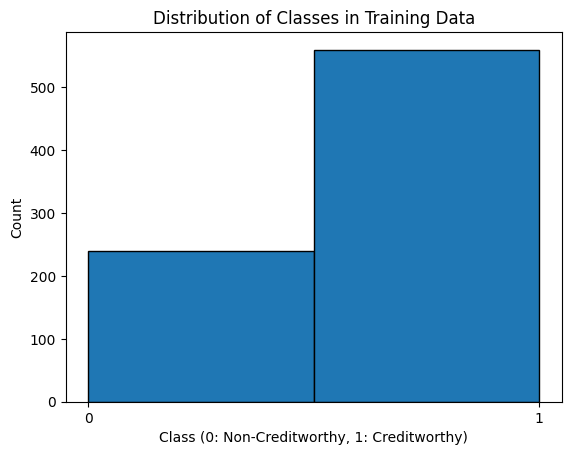

In [97]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

91 0.8267261904761904
92 0.8123809523809523
93 0.8205952380952382
94 0.8188690476190476
95 0.8125595238095239
96 0.8310119047619048
97 0.8249404761904762
98 0.8254761904761904
99 0.82125


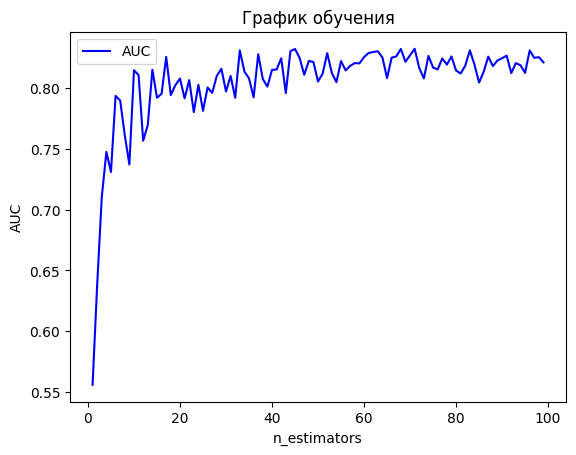

71 0.8323809523809523


In [98]:
def graf(A, history, str):
    plt.plot(A, history, 'b', label='AUC')
    plt.title('График обучения')
    plt.xlabel(str)
    plt.ylabel('AUC')
    plt.legend()
    plt.show()
'''
history = []
max = 0
max_i = 0
for i in range(100, 1000, 100):
    rf_model = RandomForestClassifier(n_estimators=i)
    rf_model.fit(X_train, y_train)
    rf_prob = rf_model.predict_proba(X_test)[:, 1]
    rf_roc_auc = roc_auc_score(y_test, rf_prob)
    history.append(rf_roc_auc)
    if max < rf_roc_auc:
        max = rf_roc_auc
        max_i = i
graf(range(100, 1000, 100), history, 'n_estimators')
print(max_i, max)
'''
'''history = []
max = 0
max_i = 0
for i in range(2, 100):
    rf_model = RandomForestClassifier(min_samples_split=i)
    rf_model.fit(X_train, y_train)
    rf_prob = rf_model.predict_proba(X_test)[:, 1]
    rf_roc_auc = roc_auc_score(y_test, rf_prob)
    history.append(rf_roc_auc)
    if max < rf_roc_auc:
        max = rf_roc_auc
        max_i = i
    if (i > 90):
        print(i, rf_roc_auc)
graf(range(2, 100), history, 'min_samples_split')
print(max_i, max)'''

history = []
max = 0
max_i = 0
for i in range(1, 100):
    rf_model = RandomForestClassifier(n_estimators=i)
    rf_model.fit(X_train, y_train)
    rf_prob = rf_model.predict_proba(X_test)[:, 1]
    rf_roc_auc = roc_auc_score(y_test, rf_prob)
    history.append(rf_roc_auc)
    if max < rf_roc_auc:
        max = rf_roc_auc
        max_i = i
    if (i > 90):
        print(i, rf_roc_auc)
graf(range(1, 100), history, 'n_estimators')
print(max_i, max)

In [99]:
# Обучение Random Forest 
rf_model = RandomForestClassifier(min_samples_split=83)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_prob)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=200)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)
gb_prob = gb_model.predict_proba(X_test)[:, 1]

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_prob)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.83
Accuracy: 0.78
Precision: 0.77
Recall: 0.98

Gradient Boosting метрики:
ROC AUC: 0.80
Accuracy: 0.77
Precision: 0.82
Recall: 0.85


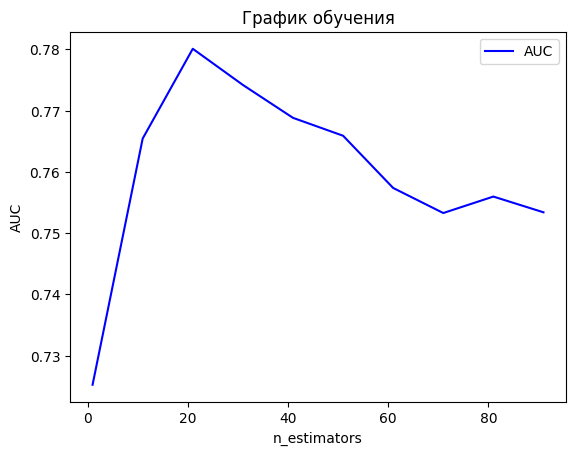

21 0.7800958391771857


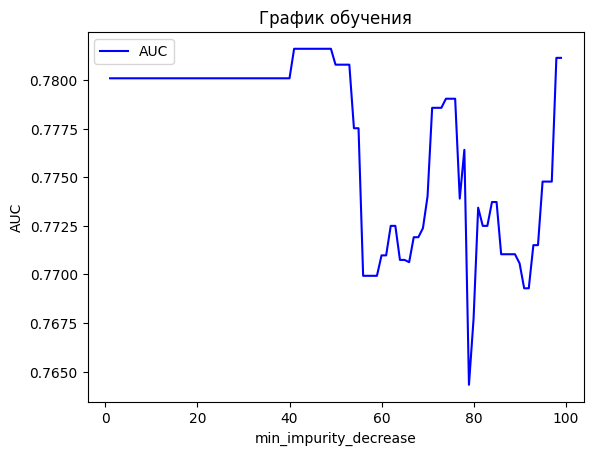

41 0.7816152407667134


In [43]:
history = []
max = 0
max_i = 0

for i in range(1, 100, 10):
    gb_model = GradientBoostingClassifier(n_estimators=i, random_state=42)
    gb_model.fit(X_train, y_train)

    gb_prob = gb_model.predict_proba(X_test)[:, 1]

    gb_roc_auc = roc_auc_score(y_test, gb_prob)
    history.append(gb_roc_auc)
    if max < gb_roc_auc:
        max = gb_roc_auc
        max_i = i
graf(range(1, 100, 10), history, 'n_estimators')
print(max_i, max) #21 - 0.7800958391771857
'''
history = []
max = 0
max_i = 0

for i in range(10, 900, 10):
    gb_model = GradientBoostingClassifier(n_estimators=21, random_state=42, learning_rate=i/0.001)
    gb_model.fit(X_train, y_train)

    gb_prob = gb_model.predict_proba(X_test)[:, 1]

    gb_roc_auc = roc_auc_score(y_test, gb_prob)
    history.append(gb_roc_auc)
    if max < gb_roc_auc:
        max = gb_roc_auc
        max_i = i
graf(range(10, 900, 10), history, 'learning_rate')
print(max_i, max)
'''
'''history = []
max = 0
max_i = 0

for i in range(2, 100):
    gb_model = GradientBoostingClassifier(n_estimators=21, random_state=42, min_samples_split=i)
    gb_model.fit(X_train, y_train)

    gb_prob = gb_model.predict_proba(X_test)[:, 1]

    gb_roc_auc = roc_auc_score(y_test, gb_prob)
    history.append(gb_roc_auc)
    if max < gb_roc_auc:
        max = gb_roc_auc
        max_i = i
graf(range(2, 100), history, 'min_samples_split')
print(max_i, max)

history = []
max = 0
max_i = 0

for i in range(1, 100):
    gb_model = GradientBoostingClassifier(n_estimators=21, random_state=42, min_samples_leaf=i)
    gb_model.fit(X_train, y_train)

    gb_prob = gb_model.predict_proba(X_test)[:, 1]

    gb_roc_auc = roc_auc_score(y_test, gb_prob)
    history.append(gb_roc_auc)
    if max < gb_roc_auc:
        max = gb_roc_auc
        max_i = i
graf(range(1, 100), history, 'min_samples_leaf')
print(max_i, max)'''

'''history = []
max = 0
max_i = 0

for i in range(1, 10):
    gb_model = GradientBoostingClassifier(n_estimators=21, random_state=42, max_depth=i)
    gb_model.fit(X_train, y_train)

    gb_prob = gb_model.predict_proba(X_test)[:, 1]

    gb_roc_auc = roc_auc_score(y_test, gb_prob)
    history.append(gb_roc_auc)
    if max < gb_roc_auc:
        max = gb_roc_auc
        max_i = i
graf(range(1, 100), history, 'max_depth')
print(max_i, max) # 3 
'''
history = []
max = 0
max_i = 0

for i in range(1, 100):
    gb_model = GradientBoostingClassifier(n_estimators=21, random_state=42, min_impurity_decrease=i/100)
    gb_model.fit(X_train, y_train)

    gb_prob = gb_model.predict_proba(X_test)[:, 1]

    gb_roc_auc = roc_auc_score(y_test, gb_prob)
    history.append(gb_roc_auc)
    if max < gb_roc_auc:
        max = gb_roc_auc
        max_i = i
        
graf(range(1, 100), history, 'min_impurity_decrease')
print(max_i, max)

    

In [8]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)
mlp_prob = mlp_model.predict_proba(X_test)[:, 1]

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_prob)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.60
Accuracy: 0.65
Precision: 0.72
Recall: 0.79


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели